In [286]:
#Required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action="ignore")

In [287]:
#Reading the dataset and displaying top 5 observation unit
df = pd.read_csv("train.csv")

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [288]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [290]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

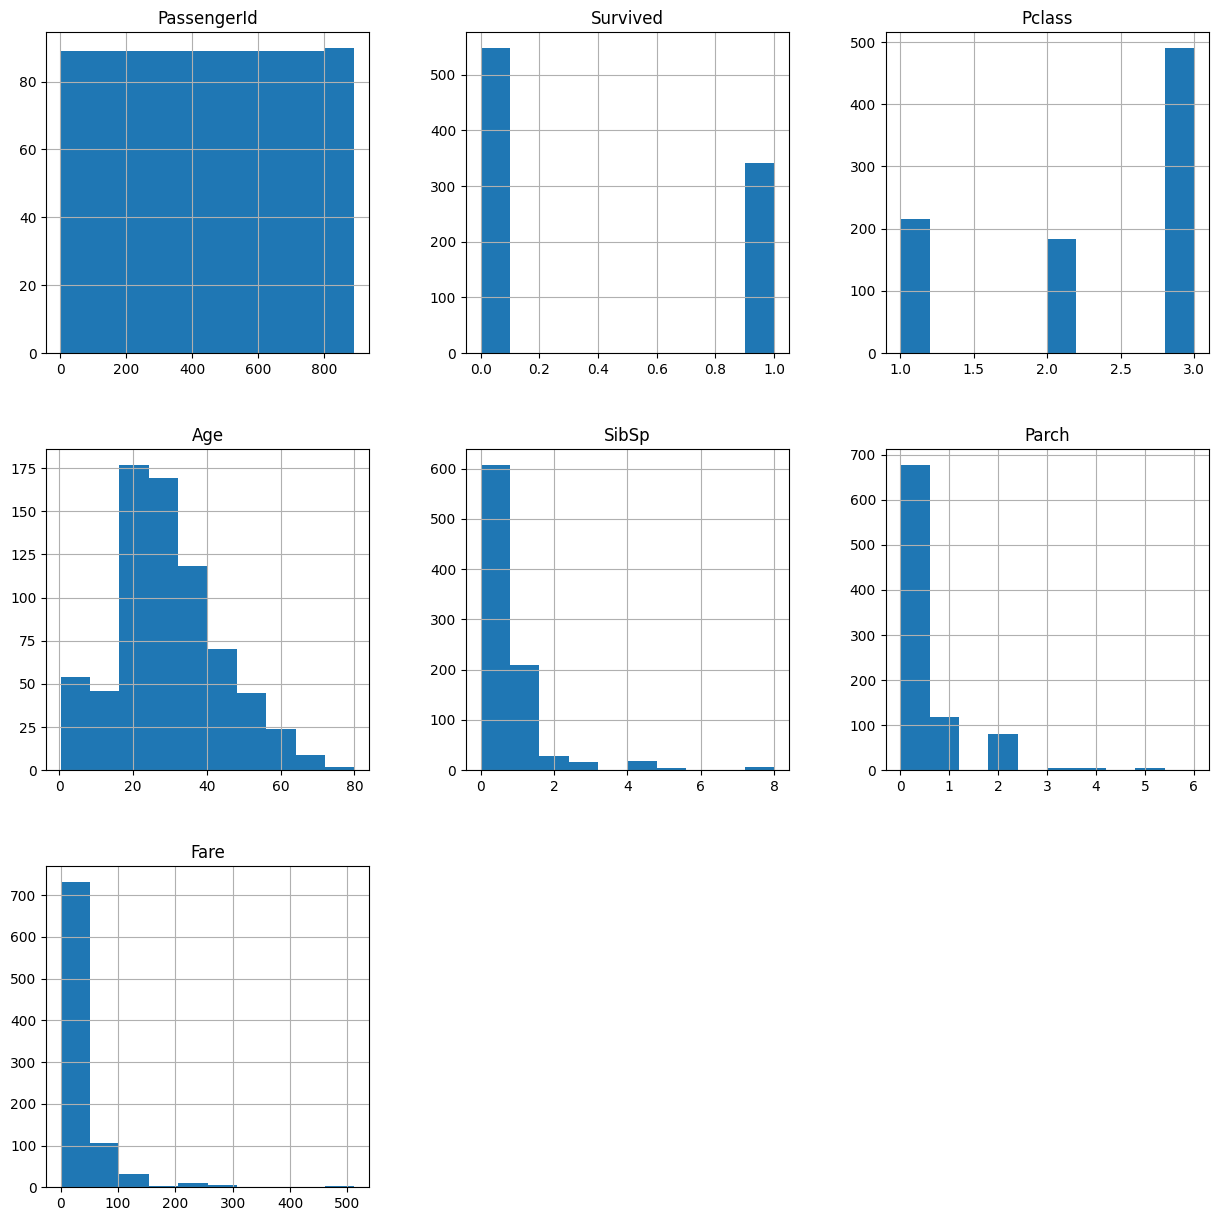

In [291]:
df.hist(figsize = (15,15))

## 2) Data Preprocessing
## 2.1) Missing Observation Analysis

In [292]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [293]:
# Recalculating the median age for passengers who survived and did not survive using the original dataframe
median_age_survived_df = df[df['Survived'] == 1]['Age'].median()
median_age_not_survived_df = df[df['Survived'] == 0]['Age'].median()

# Filling missing 'Age' values for survivors with the median age of survivors in the original dataframe
df.loc[(df['Age'].isnull()) & (df['Survived'] == 1), 'Age'] = median_age_survived_df

# Filling missing 'Age' values for non-survivors with the median age of non-survivors in the original dataframe
df.loc[(df['Age'].isnull()) & (df['Survived'] == 0), 'Age'] = median_age_not_survived_df




In [294]:
df.drop(columns=['Name'], inplace = True)
df.drop(columns=['Cabin'], inplace = True)
df.drop(columns=['Ticket'], inplace = True)
df.drop(columns=['PassengerId'], inplace = True)

In [295]:
df.dropna(subset=['Embarked'], inplace=True)


In [296]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

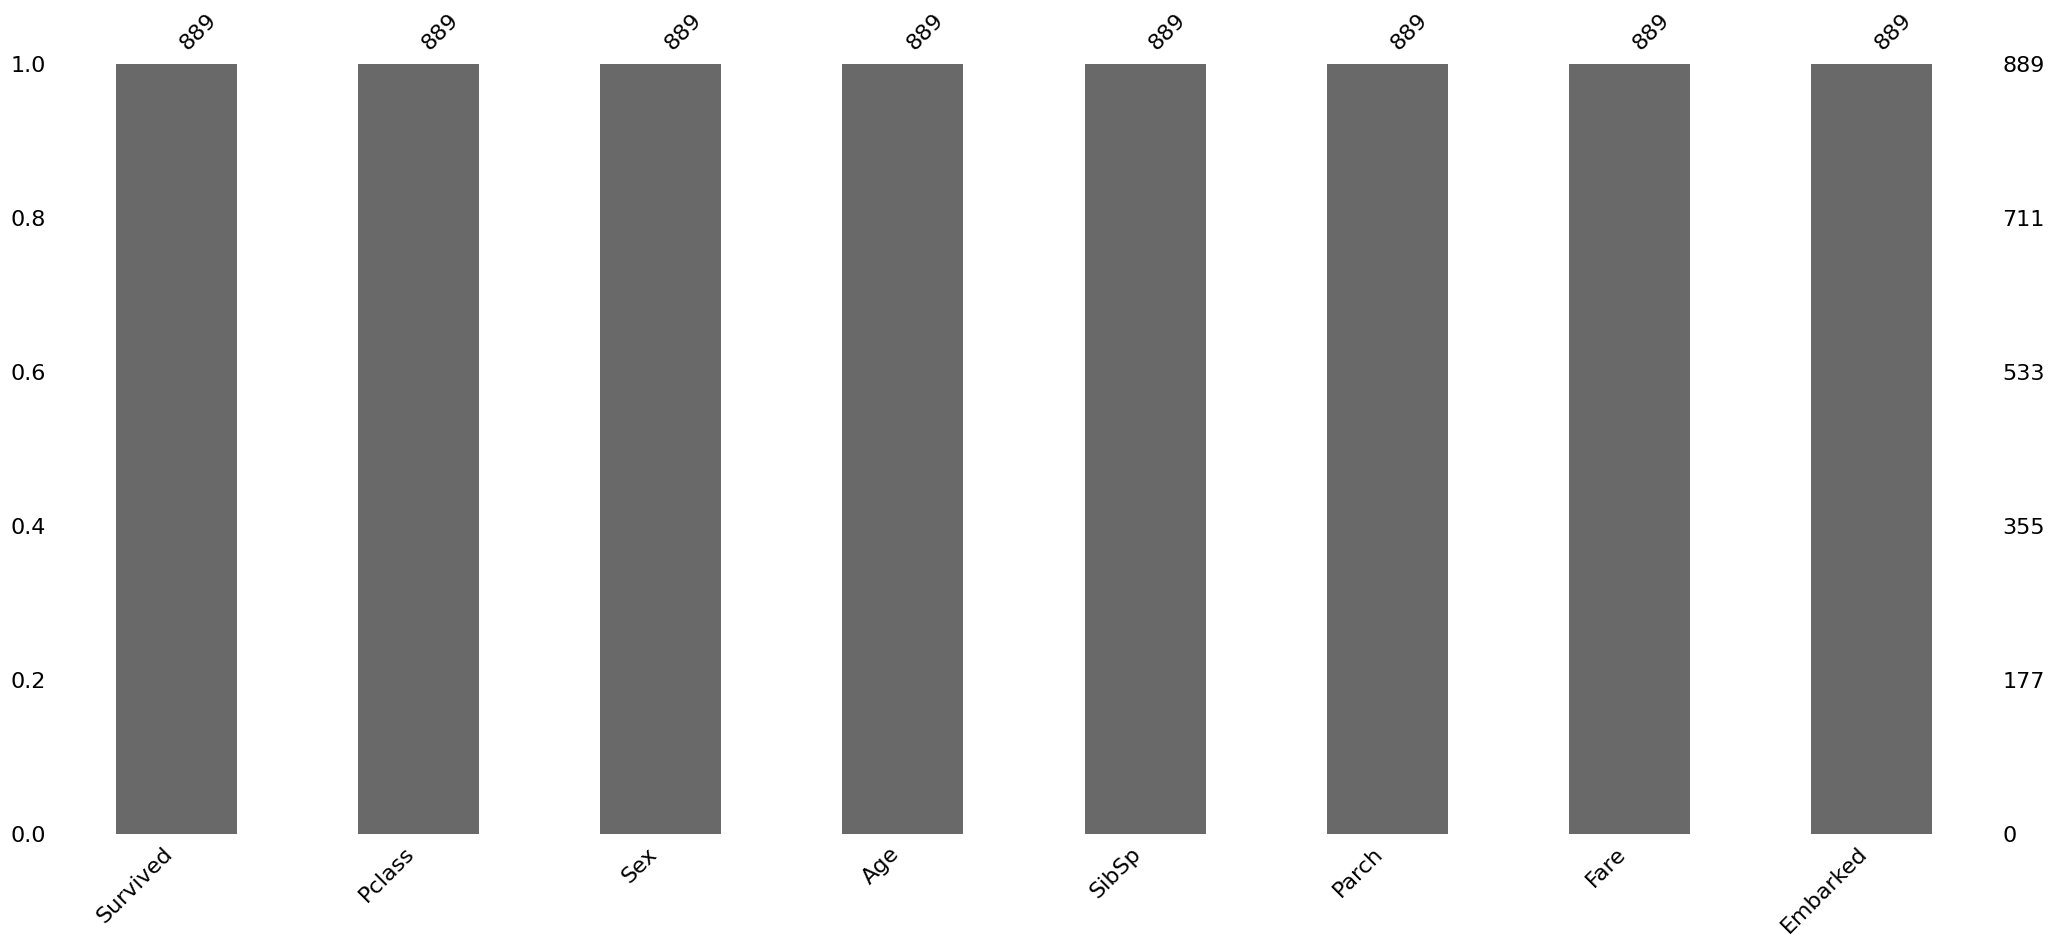

In [297]:
import missingno as msno
msno.bar(df);

## 2.2) Outlier Observation Analysis


In [298]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df.columns:
    # Checking if the column is numeric
    if pd.api.types.is_numeric_dtype(df[feature]):
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
            print(feature, "yes")  # Indicates outliers are present
        else:
            print(feature, "no")  # Indicates no outliers
    else:
        print(feature, "skipped")  # Indicates the feature is not numeric and is skipped


Survived no
Pclass no
Sex skipped
Age yes
SibSp yes
Parch yes
Fare yes
Embarked skipped


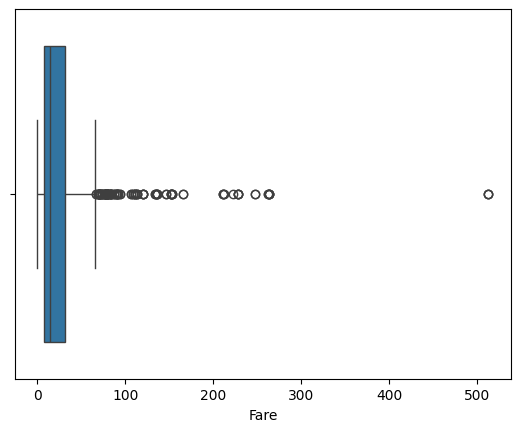

In [299]:
import seaborn as sns
sns.boxplot(x = df["Fare"]);

In [300]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Fare"] > upper,"Fare"] = upper

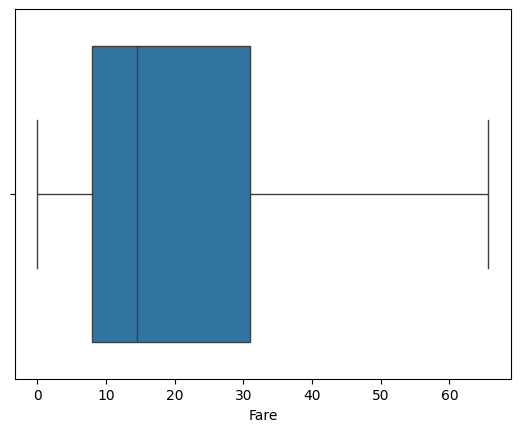

In [301]:
import seaborn as sns
sns.boxplot(x = df["Fare"]);

## 2.3) Local Outlier Factor (LOF)

In [302]:
df = pd.get_dummies(df, columns =["Sex","Embarked"], dtype=int)

In [303]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [304]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-1.55262438e+10, -9.92152370e+09, -9.92152370e+09, -9.92152370e+09,
       -9.27875184e+09, -9.02234780e+09, -6.65387675e+09, -6.34333648e+09,
       -6.12500000e+09, -6.06153688e+09, -6.06153688e+09, -6.06153688e+09,
       -5.71022506e+09, -5.22941593e+09, -4.23843484e+09, -1.39746000e+09,
       -1.29993000e+09, -1.20662000e+09, -1.20662000e+09, -1.20662000e+09,
       -1.15662000e+09, -9.16480001e+08, -7.83360001e+08, -4.16000001e+08,
       -7.60232797e+01, -6.08571664e+01, -5.76482949e+01, -4.51240878e+01,
       -4.13326303e+01, -3.95893738e+01])

In [305]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[5]
threshold

-9022347798.959778

In [306]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [307]:
# The size of the data set was examined.
df.shape

(883, 11)

## 3) Feature Engineering

In [308]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,65.6563,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [309]:
# Creating new columns 'SibSp_0', 'SibSp_1', 'SibSp_2plus' based on the values in 'SibSp'
df['SibSp_0'] = (df['SibSp'] == 0).astype(int)
df['SibSp_1'] = (df['SibSp'] == 1).astype(int)
df['SibSp_2plus'] = (df['SibSp'] > 1).astype(int)
df.drop(columns=['SibSp'], inplace = True)


In [310]:
df.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2plus
0,0,3,22.0,0,7.2500,0,1,0,0,1,0,1,0
1,1,1,38.0,0,65.6563,1,0,1,0,0,0,1,0
2,1,3,26.0,0,7.9250,1,0,0,0,1,1,0,0
3,1,1,35.0,0,53.1000,1,0,0,0,1,0,1,0
4,0,3,35.0,0,8.0500,0,1,0,0,1,1,0,0


In [311]:
# Defining the bins for 'low', 'middle', and 'high' classes based on 'Fare'
fare_bins = [0, df['Fare'].quantile(0.33), df['Fare'].quantile(0.67), df['Fare'].max()]
fare_labels = ['low', 'middle', 'high']

# Creating the new categorical column based on these bins
df['Fare_Class'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
df.drop(columns=['Fare'], inplace = True)
df


,Survived,Pclass,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2plus,Fare_Class
0,0,3,22.0,0,0,1,0,0,1,0,1,0,low
1,1,1,38.0,0,1,0,1,0,0,0,1,0,high
2,1,3,26.0,0,1,0,0,0,1,1,0,0,low
3,1,1,35.0,0,1,0,0,0,1,0,1,0,high
4,0,3,35.0,0,0,1,0,0,1,1,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,0,1,1,0,0,middle
887,1,1,19.0,0,1,0,0,0,1,1,0,0,high
888,0,3,28.0,2,1,0,0,0,1,0,1,0,middle
889,1,1,26.0,0,0,1,1,0,0,1,0,0,high


In [312]:
# Creating 'young', 'middle', and 'old' age classes by dividing the Age range into three equal parts
df['Age_Class'] = pd.cut(df['Age'], bins=3, labels=['young', 'middle', 'old'])

# Dropping the original 'Age' column
df.drop('Age', axis=1, inplace=True)

df[['Age_Class']].head()  # Displaying the first few rows for verification of the Age_Class column


,Age_Class
0,young
1,middle
2,young
3,middle
4,middle


## 4) One Hot Encoding

In [313]:
df = pd.get_dummies(df, columns =["Fare_Class","Age_Class"], dtype=int)

In [314]:
df

,Survived,Pclass,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2plus,Fare_Class_low,Fare_Class_middle,Fare_Class_high,Age_Class_young,Age_Class_middle,Age_Class_old
0,0,3,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,1,3,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
4,0,3,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
887,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0
888,0,3,2,1,0,0,0,1,0,1,0,0,1,0,0,1,0
889,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0


In [315]:
y = df["Survived"]

In [316]:
X = df.drop(["Survived"], axis = 1)

In [317]:
X

,Pclass,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2plus,Fare_Class_low,Fare_Class_middle,Fare_Class_high,Age_Class_young,Age_Class_middle,Age_Class_old
0,3,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,3,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
4,3,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
887,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0
888,3,2,1,0,0,0,1,0,1,0,0,1,0,0,1,0
889,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0


In [318]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 883, dtype: int64

## 5) Base Models

In [319]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', XGBClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.792799 (0.023914)
KNN: 0.787168 (0.024520)
CART: 0.794012 (0.034861)
RF: 0.805312 (0.032860)
SVM: 0.807508 (0.030525)
XGB: 0.806512 (0.038715)
[LightGBM] [Info] Number of positive: 305, number of negative: 489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 794, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384131 -> initscore=-0.472051
[LightGBM] [Info] Start training from score -0.472051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

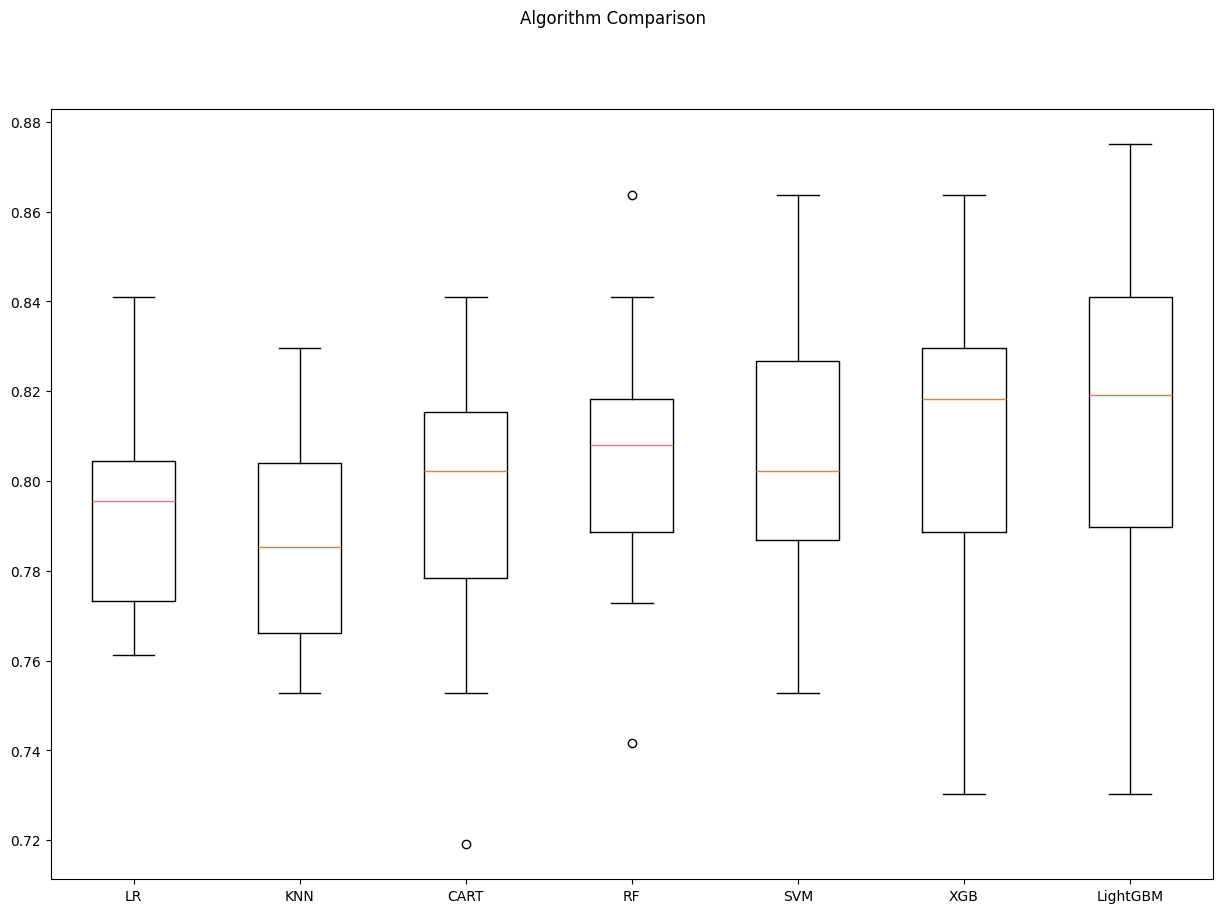

In [320]:
for name, model in models:
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [321]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 150, 250, 400]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 7, 15, 20]),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [1, 3, 6, 10]),
        'gamma': trial.suggest_categorical('gamma', [0.1, 1.0, 3.0, 5.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.1, 0.2, 0.3]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 0.9, 1.0]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.7, 0.9, 1.0])
    }

    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss')

    score = cross_val_score(model, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3))
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Displaying the best parameters and the corresponding accuracy
best_trial = study.best_trial
print(f"Best trial: {best_trial.params}")
print(f"Best accuracy: {best_trial.value}")


[I 2024-01-15 18:03:23,422] A new study created in memory with name: no-name-a2b8cc24-e98f-482d-a387-12404d01534d
[I 2024-01-15 18:03:23,556] Trial 0 finished with value: 0.796187401514278 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 1.0, 'learning_rate': 0.2, 'subsample': 0.5, 'colsample_bytree': 0.7}. Best is trial 0 with value: 0.796187401514278.
[I 2024-01-15 18:03:23,662] Trial 1 finished with value: 0.8018486490641453 and parameters: {'n_estimators': 250, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.1, 'learning_rate': 0.1, 'subsample': 0.5, 'colsample_bytree': 0.7}. Best is trial 1 with value: 0.8018486490641453.
[I 2024-01-15 18:03:23,696] Trial 2 finished with value: 0.7905107805834198 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 0.1, 'learning_rate': 0.2, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 1 with value: 0.8018486490641453.
[I 2024-01-15 18:03:23,786] Trial 3 finished 

Best trial: {'n_estimators': 250, 'max_depth': 20, 'min_child_weight': 1, 'gamma': 5.0, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 1.0}
Best accuracy: 0.8108805103962489


In [322]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_params = {
    'n_estimators': 50,
    'max_depth': 3,
    'min_child_weight': 6,
    'gamma': 0.1,
    'learning_rate': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 0.5
}

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
predictions = model.predict(X_test)

# Çeşitli metriklerin hesaplanması
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Metriklerin yazdırılması
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8305084745762712
Precision: 0.8367346938775511
Recall: 0.6507936507936508
F1 Score: 0.7321428571428571
Confusion Matrix:
[[106   8]
 [ 22  41]]


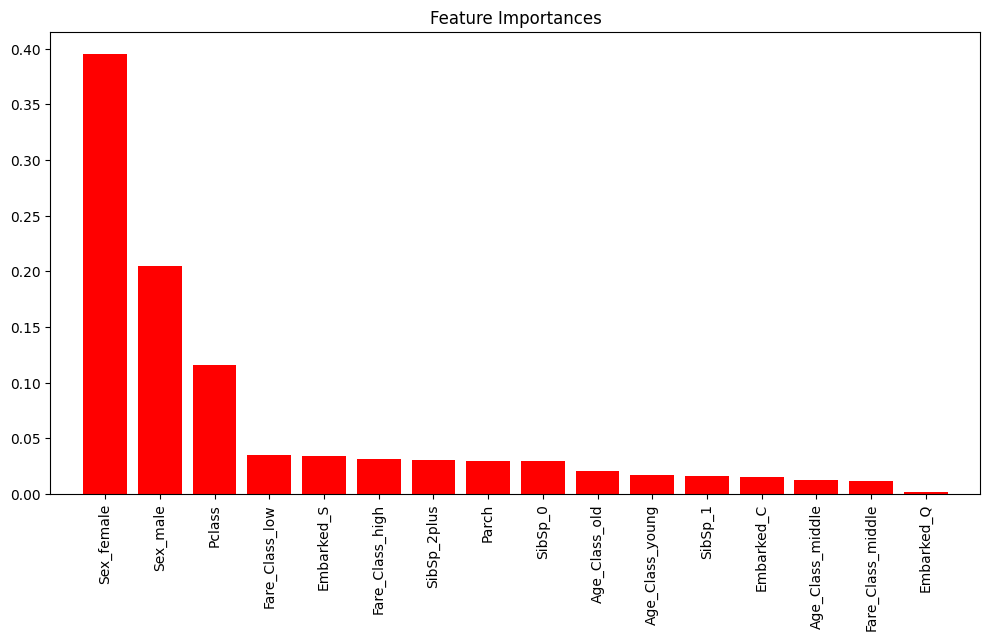

In [323]:
importances = model.feature_importances_

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting the Feature Importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()